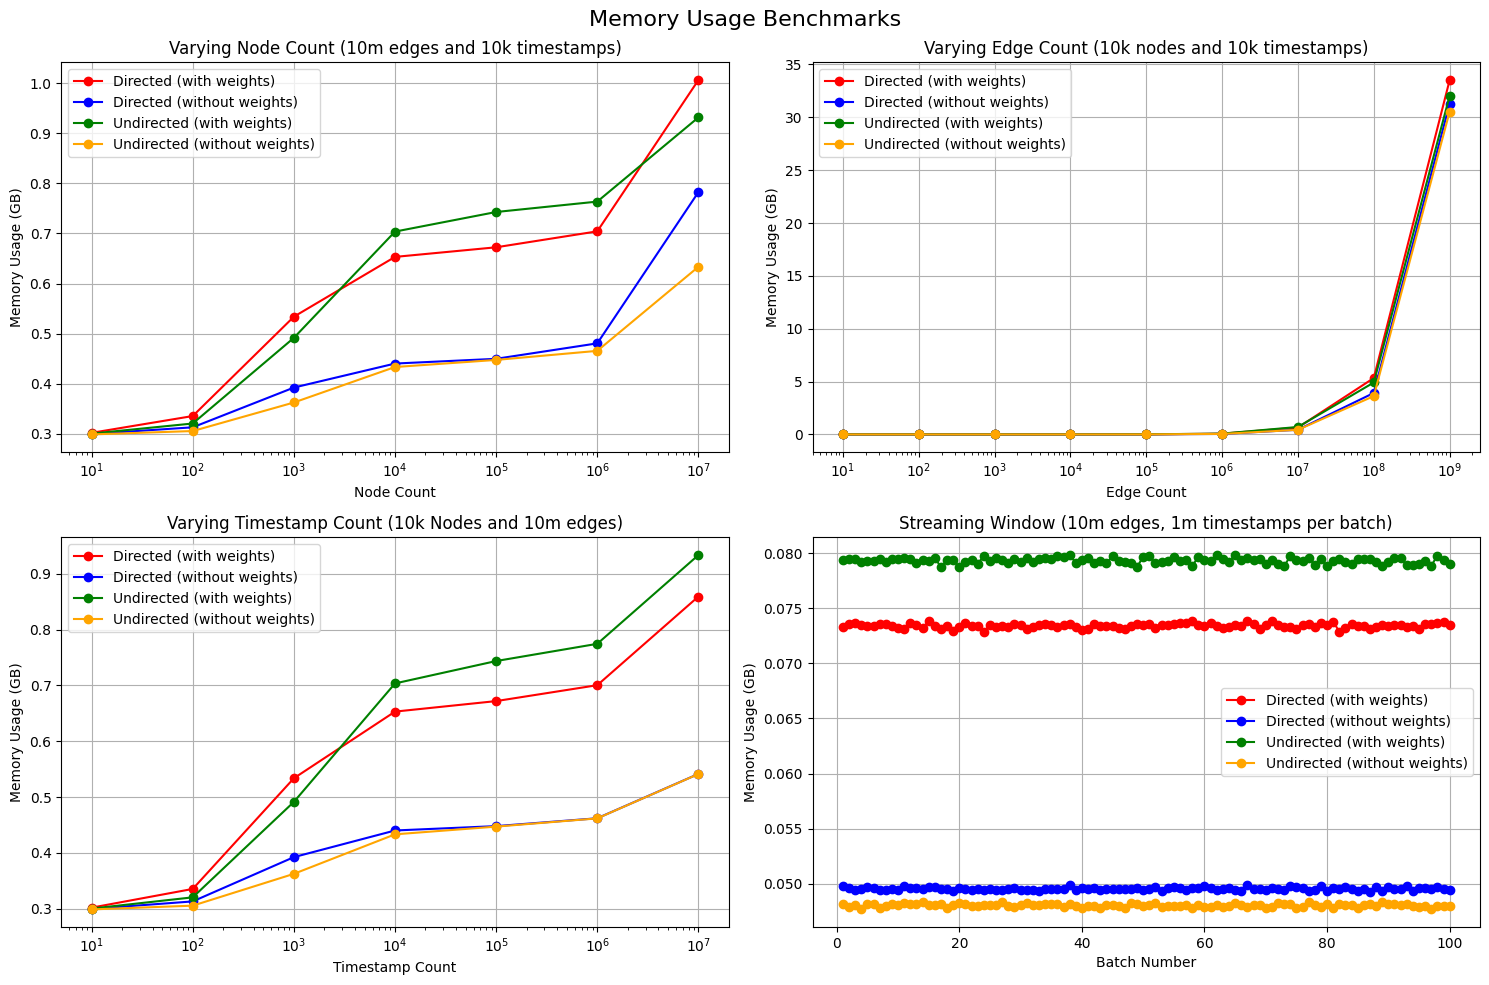

In [48]:
import pickle
import matplotlib.pyplot as plt

# Load results
with open('results/memory_benchmarking.pickle', 'rb') as f:
   results = pickle.load(f)

# Create 2x2 subplot
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Memory Usage Benchmarks', fontsize=16)

# Configuration styles
configs = ['directed_with_weights', 'directed_without_weights',
          'undirected_with_weights', 'undirected_without_weights']
config_labels = ['Directed (with weights)', 'Directed (without weights)',
          'Undirected (with weights)', 'Undirected (without weights)']
colors = ['red', 'blue', 'green', 'orange']

# Plot 1: Increasing Nodes - Linear y-axis, log x-axis
ax = axes[0, 0]
for idx, (config, color) in enumerate(zip(configs, colors)):
   if f"increasing_nodes_{config}" in results:
       data = results[f"increasing_nodes_{config}"]
       nodes = list(data.keys())
       memory = [x / 1024 for x in data.values()]  # Convert MB to GB
       ax.semilogx(nodes, memory, 'o-', color=color, label=config_labels[idx])
ax.set_title('Varying Node Count (10m edges and 10k timestamps)')
ax.set_xlabel('Node Count')
ax.set_ylabel('Memory Usage (GB)')
ax.legend()
ax.grid(True)

# Plot 2: Increasing Edges - Linear y-axis, log x-axis
ax = axes[0, 1]
for idx, (config, color) in enumerate(zip(configs, colors)):
   if f"increasing_edges_{config}" in results:
       data = results[f"increasing_edges_{config}"]
       edges = list(data.keys())
       memory = [x / 1024 for x in data.values()]  # Convert MB to GB
       ax.semilogx(edges, memory, 'o-', color=color, label=config_labels[idx])
ax.set_title('Varying Edge Count (10k nodes and 10k timestamps)')
ax.set_xlabel('Edge Count')
ax.set_ylabel('Memory Usage (GB)')
ax.legend()
ax.grid(True)

# Plot 3: Increasing Timestamps - Linear y-axis, log x-axis
ax = axes[1, 0]
for idx, (config, color) in enumerate(zip(configs, colors)):
   if f"increasing_timestamps_{config}" in results:
       data = results[f"increasing_timestamps_{config}"]
       timestamps = list(data.keys())
       memory = [x / 1024 for x in data.values()]  # Convert MB to GB
       ax.semilogx(timestamps, memory, 'o-', color=color, label=config_labels[idx])
ax.set_title('Varying Timestamp Count (10k Nodes and 10m edges)')
ax.set_xlabel('Timestamp Count')
ax.set_ylabel('Memory Usage (GB)')
ax.legend()
ax.grid(True)

# Plot 4: Streaming Window - Both axes linear
ax = axes[1, 1]
for idx, (config, color) in enumerate(zip(configs, colors)):
   if f"streaming_window_{config}" in results:
       data = results[f"streaming_window_{config}"]
       batches = range(1, len(data) + 1)
       memory_gb = [x / 1024 for x in data]  # Convert MB to GB
       ax.plot(batches, memory_gb, 'o-', color=color, label=config_labels[idx])
ax.set_title('Streaming Window (10m edges, 1m timestamps per batch)')
ax.set_xlabel('Batch Number')
ax.set_ylabel('Memory Usage (GB)')
ax.legend()
ax.grid(True)

plt.tight_layout()
plt.savefig('results/memory_benchmarking_graph.png')
plt.show()

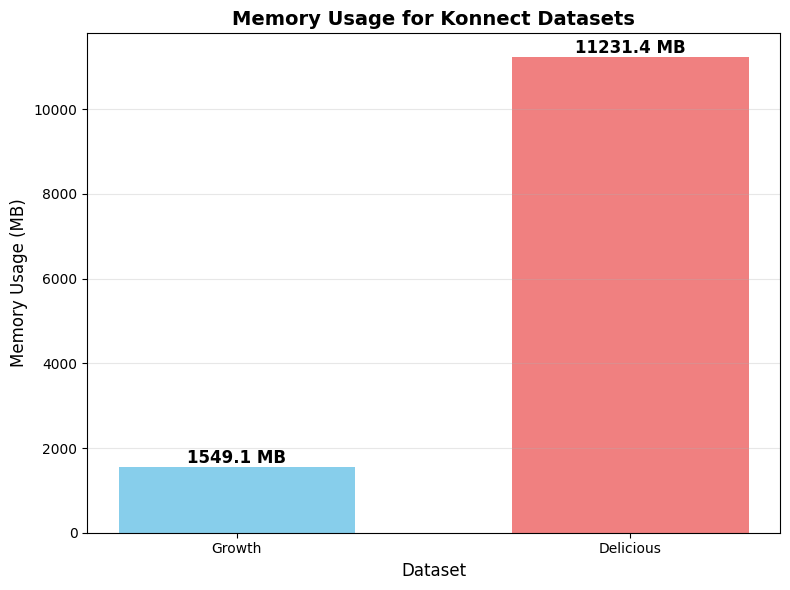

In [49]:
import pickle
import matplotlib.pyplot as plt

# Load TEA dataset results
with open('results/memory_benchmarking_tea_datasets.pickle', 'rb') as f:
    tea_results = pickle.load(f)

# Create bar chart
fig, ax = plt.subplots(figsize=(8, 6))

datasets = list(tea_results.keys())
memory_usage = list(tea_results.values())

# Capitalize dataset names for display
dataset_labels = [name.capitalize() for name in datasets]

bars = ax.bar(dataset_labels, memory_usage, color=['skyblue', 'lightcoral'], width=0.6)

# Add value labels on top of bars
for bar, value in zip(bars, memory_usage):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
            f'{value:.1f} MB', ha='center', va='bottom', fontsize=12, fontweight='bold')

ax.set_title('Memory Usage for Konnect Datasets', fontsize=14, fontweight='bold')
ax.set_ylabel('Memory Usage (MB)', fontsize=12)
ax.set_xlabel('Dataset', fontsize=12)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('results/memory_benchmarking_graph_tea_datasets.png')
plt.show()